1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [2]:
import numpy as np
import pandas as pd
import scipy as sc
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

np.random.seed(100)

<ipython-input-2-491879907693>:19: RuntimeWarning: divide by zero encountered in true_divide
  ax1.errorbar(mid, rep, yerr=1/np.sqrt(rep), fmt="none")


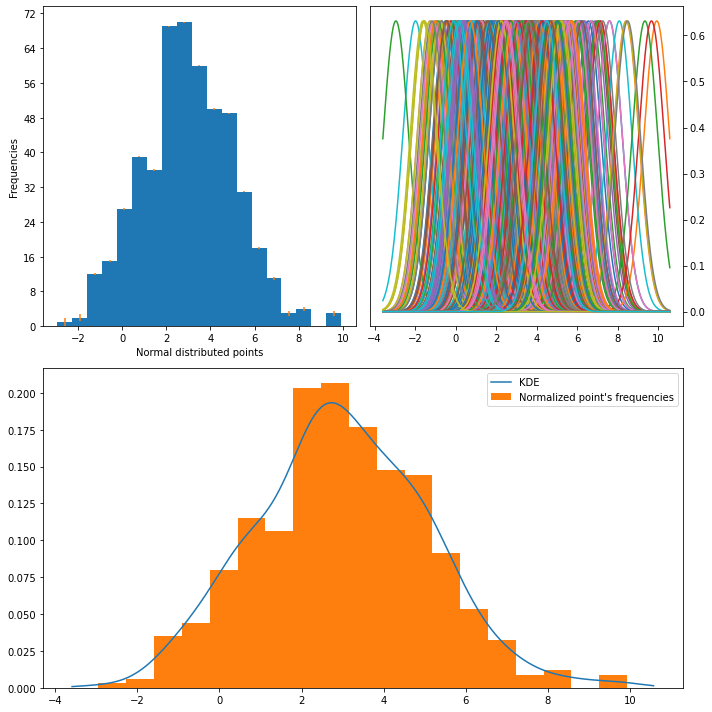

In [2]:
# structure definition
grid= (2,2)
fig = plt.figure(figsize= (10,10))
ax1 = plt.subplot2grid(grid, (0, 0))
ax2 = plt.subplot2grid(grid, (0, 1))
ax3 = plt.subplot2grid(grid, (1, 0), colspan=2)

N = 500
mean = 3
std = 2
x = np.random.normal(mean,std,N)
# following the Freedman-Diaconis rule
nbin= round((x.max()-x.min()) * N**(1/3) / (2 * 1.35*std))


# ax1 definition
rep, bins, patches = ax1.hist(x, bins=int(nbin))
mid = (bins[1:]+bins[:-1]) / 2
ax1.errorbar(mid, rep, yerr=1/np.sqrt(rep), fmt="none")
ax1.set_xlabel("Normal distributed points")
ax1.set_ylabel("Frequencies")
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
xl, xr = ax1.get_xlim()

# Gaussian funcions
x2 = np.linspace(xl, xr, N)
gstd= 1.06 * x.std() / (x.size ** (1/5))
Gauss=np.zeros((N,N))

for j in range(N):
    Gauss[j,:]= scs.norm.pdf(x2, loc=x[j], scale=gstd)
    
Gauss_tot= np.sum(Gauss, axis=0)
Gauss_tot/= sc.integrate.trapz(Gauss_tot, x2)

# ax2 definition
ax2.plot(x2, Gauss.T)
ax2.set_xlim(xl-gstd, xr+gstd)
ax2.yaxis.tick_right()

#ax3 definition
ax3.plot(x2, Gauss_tot, label="KDE")
ax3.hist(x, bins=int(nbin), density=True, label="Normalized point's frequencies")
ax3.legend(loc='upper right')
fig.tight_layout()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [3]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
#from IPython.display import Image
#Image('two_categories_scatter_plot.png')

In [4]:
def Ncateg_multifeature(means,covs,sizes):
    """ 
    Generates a dataset having D features and N category:
    
    means  =  2-D array like, of shape (N,features)
              Tuple containing all the N mean matrices
    covs   =  3-D array like, of shape (N,features,features)
              Tuple containing all the N covariance matrices
    sizes  =  1-D array like, of length N
              Tuple containing the size of each category
    """
    # simle sum() is faster then np.sum() on object != np.array
    N_feat = np.shape(means)[-1]
    out = np.zeros((sum(sizes),N_feat))
    ix  = np.zeros(sum(sizes), dtype=object)
    f   = ["feat_"+str(i+1) for i in range(N_feat)]
    a   = 0
    for i in range(len(sizes)):
        out[a:sum(sizes[:i+1])] = np.random.multivariate_normal(mean=means[i],cov=covs[i],size=sizes[i])
        ix[a:sum(sizes[:i+1])] = "categ_"+str(i+1) 
        a = sum(sizes[:i+1])
    return pd.DataFrame(out, index=ix, columns=f)

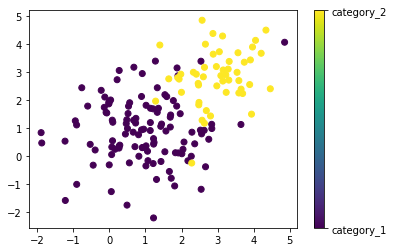

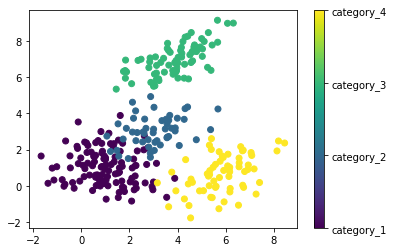

In [5]:
sample = Ncateg_multifeature(means=([1,1],[3,3]), covs=([[1,0],[0,1]], [[1,0.5],[0.5,1]]), sizes=(114,51))
color = [ int(i[6:]) for i in sample.index]

plt.scatter(x=sample.iloc[:,0], y=sample.iloc[:,1], c=color)
plt.colorbar( format='category_%d', ticks=np.unique(color))
plt.show()
##

sample = Ncateg_multifeature(means=([1,1],[3,3],[4,7],[6,1]), 
                             covs=([[1,0],[0,1]], [[1,0.5],[0.5,1]], [[1,0.7],[0.7,1]], [[1,0.3],[0.3,1]]), 
                             sizes=(114,51,75,64))
color = [ int(i[6:]) for i in sample.index]

plt.scatter(x=sample.iloc[:,0], y=sample.iloc[:,1], c=color)
plt.colorbar( format='category_%d', ticks=np.unique(color))
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [3]:
#!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
df = pd.DataFrame(np.load('residuals_261.npy',allow_pickle=True).item())
print("The features in the dataset are: ",df.columns.values)

The features in the dataset are:  ['residuals' 'distances']


In [4]:
df_clean = df[abs(df['residuals']) < 2]

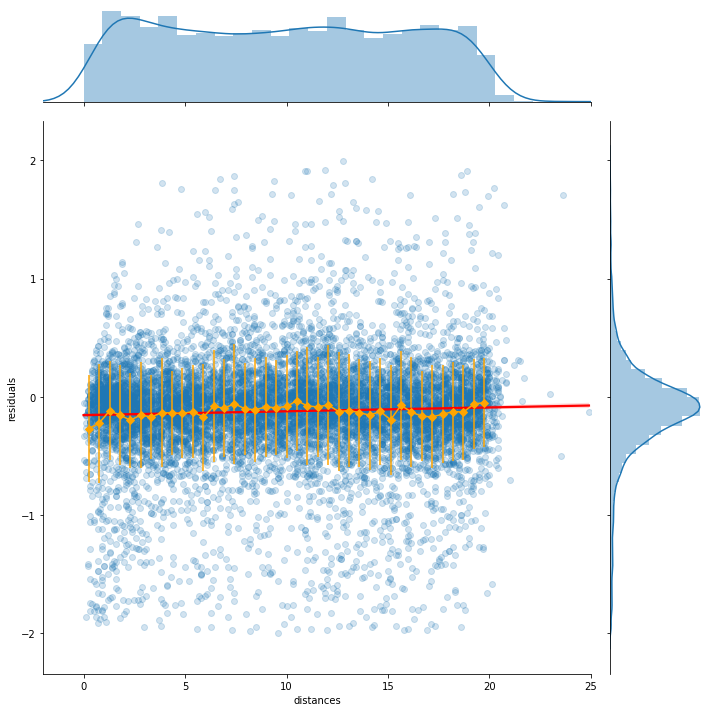

In [58]:
slope, inter, _, _, _ = sc.stats.linregress(df_clean['residuals'],df_clean['distances'])

# ricorda di aggiornare seaborn
plot = sns.jointplot(x='distances', y='residuals', data=df_clean, kind='reg', height=10,
              joint_kws={'line_kws':{'color':'red'},
                         'scatter_kws':{'alpha':.2}})

x   = np.linspace(0,20,40)
x   = (x[:-1] + x[1:])/2
y   = np.zeros(len(x))
err = np.zeros(len(x))
df_clean.sort_values('distances')
for i in range(len(x)):
    b = df_clean[(df_clean['distances'] < (x[i]+np.diff(x[:2])/2).item()) & 
                 (df_clean['distances'] > (x[i]-np.diff(x[:2])/2).item() )]
    y[i]   = b['residuals'].mean()
    err[i] = b['residuals'].std()

plt.errorbar(x,y,yerr=err, marker='D', color='orange')
plot.ax_joint.set_xlim(-2,25)
plt.show()